In [1]:
import pandas as pd
import numpy as np
from scipy.special import factorial, gammaincc

In [2]:
df = pd.read_csv('all seasons with lines.csv')
data = pd.read_csv('transformed_training_data.csv')
predictions = pd.read_csv('predictions.csv')


C:\Users\Bryant Ndongmo\AppData\Local\Temp\ipykernel_77404\4014903577.py:1: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('all seasons with lines.csv')


In [3]:
def gpmf(y, lamb, alpha):
    ay = alpha*y
    lay = lamb+ay
    term = np.exp(-(lay))
    term2 = np.power(lay, y-2)
    fact = factorial(y)

    p = lamb * term * np.power(lay, y-1) / fact

    numerator = -1
    numerator *= term2*(np.power(lamb, 2)+(alpha-1)*y*lamb-ay)*term
    dp_dlamb = numerator / fact

    numerator = -1
    numerator *= lamb*y*term2*(ay-y+lamb+1)*term
    dp_dalpha = numerator / fact

    p = np.where(p <= 0, 1e-8, p)
    p = np.where(p > 1, 1, p)
    return p, dp_dlamb, dp_dalpha

In [4]:
model_p = gpmf(predictions['Goals'], predictions['Model Lambda'], predictions['Model Alpha'])[0]
loss = -np.log(model_p)
average_loss = np.mean(loss)

null_p = gpmf(predictions['Goals'], predictions['Null Lambda'], predictions['Null Alpha'])[0]
null_loss = -np.log(null_p)
null_average_loss = np.mean(null_loss)

diff = loss-null_loss
sorted_indices = np.argsort(-np.abs(diff), axis=0)
sorted_diff = diff[sorted_indices].reshape(-1,1)

On first glance the alternative model seems better

In [5]:
np.mean(sorted_diff)

-0.0006561553177700532

However in the context of betting, it is more important to be accurate when deviating a lot from the null (line set by sportsbook)

In [6]:
data

,goals,loglines,xgoals_lines_for,goals_lines_for,goals_xgoals_for,wxgoals_lines_for,wgoals_lines_for,wgoals_xgoals_for,xgoals_lines_ag,goals_lines_ag,goals_xgoals_ag,wxgoals_lines_ag,wgoals_lines_ag,wgoals_xgoals_ag
0,2.0,0.076523,0.159950,-0.075987,-0.223839,0.163755,-0.021479,-0.170274,-0.168648,-0.100455,0.064360,-0.181391,-0.124929,0.047298
1,0.0,-0.051317,0.264361,-0.746574,-1.046688,0.255215,-0.880288,-1.175235,0.099574,0.337490,0.300656,0.097257,0.325475,0.292165
2,0.0,0.090342,0.264049,-0.392743,-0.701408,0.276206,-0.382178,-0.704720,0.185469,-0.044812,-0.185957,0.218068,-0.070135,-0.249928
3,1.0,0.317341,0.132809,0.208757,0.073326,0.140922,0.212877,0.072486,0.227432,-0.101178,-0.313541,0.207734,-0.061921,-0.247329
4,1.0,-0.383122,0.251965,-0.492576,-0.653845,0.240876,-0.319061,-0.463108,0.167219,-0.844741,-1.043984,0.203400,-0.609834,-0.837743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36475,2.0,0.644454,0.146047,0.183148,0.044858,0.114225,0.216952,0.113513,0.034444,0.013911,-0.017035,0.025076,-0.065196,-0.086697
36476,2.0,0.640414,0.047648,0.341744,0.280247,0.023759,0.322177,0.280229,0.138077,0.124378,-0.012631,0.096671,0.312807,0.225928
36477,0.0,0.535226,0.151399,0.138357,-0.022716,0.197221,0.133488,-0.073147,0.056411,0.177510,0.129163,0.003708,0.164979,0.166985
36478,1.0,0.565803,0.182652,-0.024642,-0.232603,0.186308,0.015187,-0.193264,0.145639,-0.170501,-0.343341,0.136698,-0.076249,-0.231761


In [7]:
predictions

,Null Lambda,Model Lambda,Null Alpha,Model Alpha,Null Prediction,Model Prediction,Goals
0,1.079527,1.076298,-0.024,-0.020297,1.054226,1.054888,2.0
1,0.949978,0.985569,-0.024,-0.030603,0.927713,0.956304,0.0
2,1.094548,1.142372,-0.024,-0.034942,1.068895,1.103803,0.0
3,1.373471,1.371363,-0.024,-0.025032,1.341280,1.337874,1.0
4,0.681730,0.679763,-0.024,-0.031761,0.665752,0.658837,1.0
...,...,...,...,...,...,...,...
36475,1.904947,1.941786,-0.024,-0.032600,1.860299,1.880482,2.0
36476,1.897266,1.844239,-0.024,-0.022457,1.852799,1.803732,2.0
36477,1.707834,1.759997,-0.024,-0.026602,1.667807,1.714391,0.0
36478,1.760862,1.833753,-0.024,-0.039223,1.719591,1.764542,1.0


In [8]:
pd.concat([data, predictions], axis=1).drop('Goals', axis=1)

,goals,loglines,xgoals_lines_for,goals_lines_for,goals_xgoals_for,wxgoals_lines_for,wgoals_lines_for,wgoals_xgoals_for,xgoals_lines_ag,goals_lines_ag,goals_xgoals_ag,wxgoals_lines_ag,wgoals_lines_ag,wgoals_xgoals_ag,Null Lambda,Model Lambda,Null Alpha,Model Alpha,Null Prediction,Model Prediction
0,2.0,0.076523,0.159950,-0.075987,-0.223839,0.163755,-0.021479,-0.170274,-0.168648,-0.100455,0.064360,-0.181391,-0.124929,0.047298,1.079527,1.076298,-0.024,-0.020297,1.054226,1.054888
1,0.0,-0.051317,0.264361,-0.746574,-1.046688,0.255215,-0.880288,-1.175235,0.099574,0.337490,0.300656,0.097257,0.325475,0.292165,0.949978,0.985569,-0.024,-0.030603,0.927713,0.956304
2,0.0,0.090342,0.264049,-0.392743,-0.701408,0.276206,-0.382178,-0.704720,0.185469,-0.044812,-0.185957,0.218068,-0.070135,-0.249928,1.094548,1.142372,-0.024,-0.034942,1.068895,1.103803
3,1.0,0.317341,0.132809,0.208757,0.073326,0.140922,0.212877,0.072486,0.227432,-0.101178,-0.313541,0.207734,-0.061921,-0.247329,1.373471,1.371363,-0.024,-0.025032,1.341280,1.337874
4,1.0,-0.383122,0.251965,-0.492576,-0.653845,0.240876,-0.319061,-0.463108,0.167219,-0.844741,-1.043984,0.203400,-0.609834,-0.837743,0.681730,0.679763,-0.024,-0.031761,0.665752,0.658837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36475,2.0,0.644454,0.146047,0.183148,0.044858,0.114225,0.216952,0.113513,0.034444,0.013911,-0.017035,0.025076,-0.065196,-0.086697,1.904947,1.941786,-0.024,-0.032600,1.860299,1.880482
36476,2.0,0.640414,0.047648,0.341744,0.280247,0.023759,0.322177,0.280229,0.138077,0.124378,-0.012631,0.096671,0.312807,0.225928,1.897266,1.844239,-0.024,-0.022457,1.852799,1.803732
36477,0.0,0.535226,0.151399,0.138357,-0.022716,0.197221,0.133488,-0.073147,0.056411,0.177510,0.129163,0.003708,0.164979,0.166985,1.707834,1.759997,-0.024,-0.026602,1.667807,1.714391
36478,1.0,0.565803,0.182652,-0.024642,-0.232603,0.186308,0.015187,-0.193264,0.145639,-0.170501,-0.343341,0.136698,-0.076249,-0.231761,1.760862,1.833753,-0.024,-0.039223,1.719591,1.764542


Let's add some columns

In [9]:
data_with_predictions = pd.concat([data, predictions], axis=1).drop('Goals', axis=1)
data_with_predictions['Null Probability'] = gpmf(data_with_predictions['goals'], data_with_predictions['Null Lambda'], data_with_predictions['Null Alpha'])[0]
data_with_predictions['Model Probability'] = gpmf(data_with_predictions['goals'], data_with_predictions['Model Lambda'], data_with_predictions['Model Alpha'])[0]
data_with_predictions['Null Loss'] = -np.log(data_with_predictions['Null Probability'])
data_with_predictions['Model Loss'] = -np.log(data_with_predictions['Model Probability'])
data_with_predictions['Diff'] = diff
data_with_predictions['Diff2'] = data_with_predictions[['Null Prediction', 'Model Prediction']].max(axis=1) / data_with_predictions[['Null Prediction', 'Model Prediction']].min(axis=1)
data_with_predictions.insert(1, 'P-value', gammaincc(data_with_predictions['goals']+1, data_with_predictions['Model Prediction'])) 
data_with_predictions

,goals,P-value,loglines,xgoals_lines_for,goals_lines_for,goals_xgoals_for,wxgoals_lines_for,wgoals_lines_for,wgoals_xgoals_for,xgoals_lines_ag,...,Null Alpha,Model Alpha,Null Prediction,Model Prediction,Null Probability,Model Probability,Null Loss,Model Loss,Diff,Diff2
0,2.0,0.909331,0.076523,0.159950,-0.075987,-0.223839,0.163755,-0.021479,-0.170274,-0.168648,...,-0.024,-0.020297,1.054226,1.054888,0.198471,0.197851,1.617111,1.620242,0.003131,1.000628
1,0.0,0.384311,-0.051317,0.264361,-0.746574,-1.046688,0.255215,-0.880288,-1.175235,0.099574,...,-0.024,-0.030603,0.927713,0.956304,0.386750,0.373227,0.949978,0.985569,0.035591,1.030819
2,0.0,0.331608,0.090342,0.264049,-0.392743,-0.701408,0.276206,-0.382178,-0.704720,0.185469,...,-0.024,-0.034942,1.068895,1.103803,0.334691,0.319061,1.094548,1.142372,0.047823,1.032658
3,1.0,0.613465,0.317341,0.132809,0.208757,0.073326,0.140922,0.212877,0.072486,0.227432,...,-0.024,-0.025032,1.341280,1.337874,0.356247,0.356819,1.032130,1.030526,-0.001604,1.002546
4,1.0,0.858370,-0.383122,0.251965,-0.492576,-0.653845,0.240876,-0.319061,-0.463108,0.167219,...,-0.024,-0.031761,0.665752,0.658837,0.353154,0.355577,1.040852,1.034013,-0.006838,1.010494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36475,2.0,0.708987,0.644454,0.146047,0.183148,0.044858,0.114225,0.216952,0.113513,0.034444,...,-0.024,-0.032600,1.860299,1.880482,0.276179,0.278965,1.286706,1.276671,-0.010036,1.010849
36476,2.0,0.729622,0.640414,0.047648,0.341744,0.280247,0.023759,0.322177,0.280229,0.138077,...,-0.024,-0.022457,1.852799,1.803732,0.276040,0.274448,1.287210,1.292993,0.005783,1.027203
36477,0.0,0.180073,0.535226,0.151399,0.138357,-0.022716,0.197221,0.133488,-0.073147,0.056411,...,-0.024,-0.026602,1.667807,1.714391,0.181258,0.172045,1.707834,1.759997,0.052163,1.027931
36478,1.0,0.473470,0.565803,0.182652,-0.024642,-0.232603,0.186308,0.015187,-0.193264,0.145639,...,-0.024,-0.039223,1.719591,1.764542,0.310039,0.304780,1.171058,1.188165,0.017107,1.026140


First let's map each feature with the corresponding loss vs the null to seek patterns

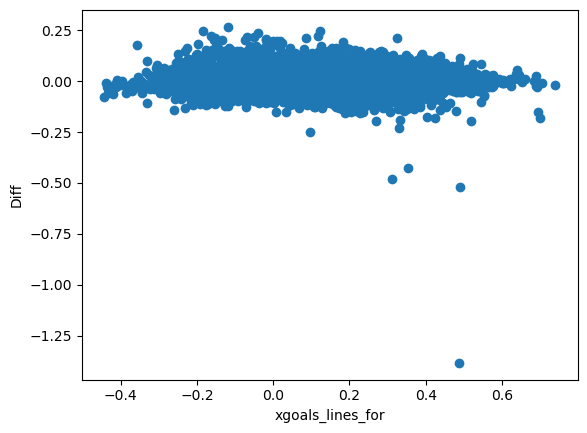

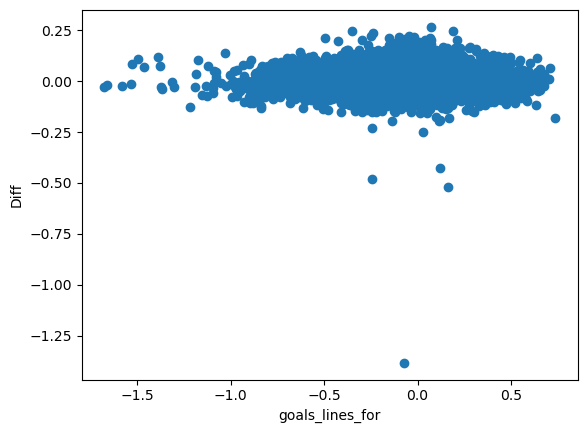

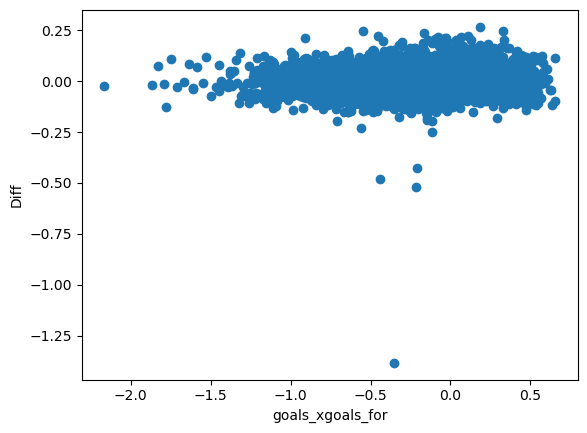

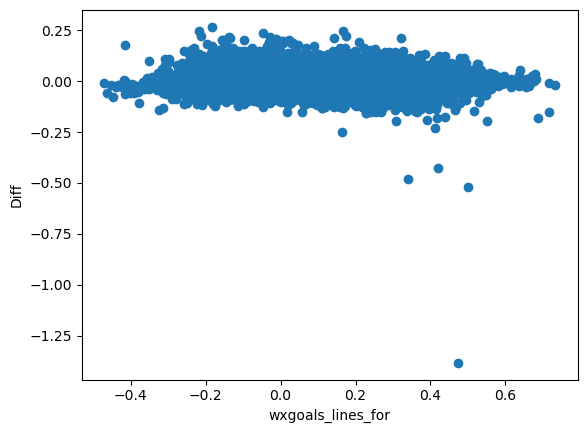

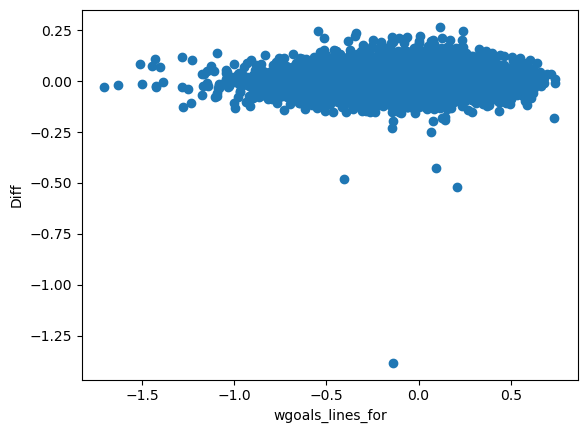

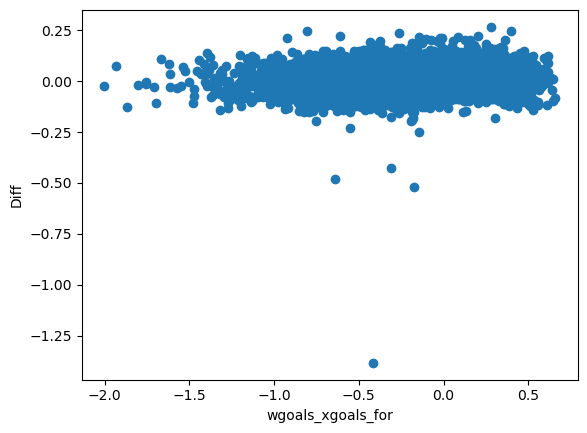

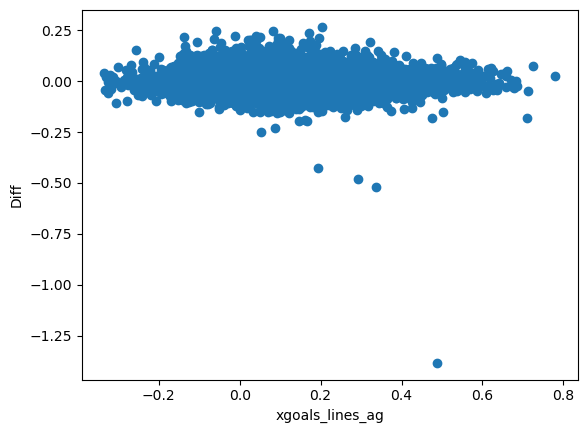

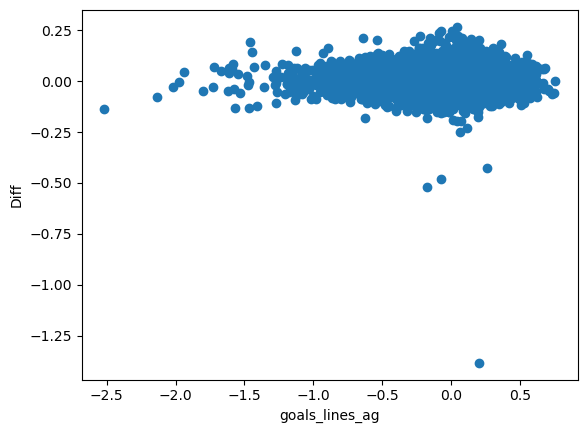

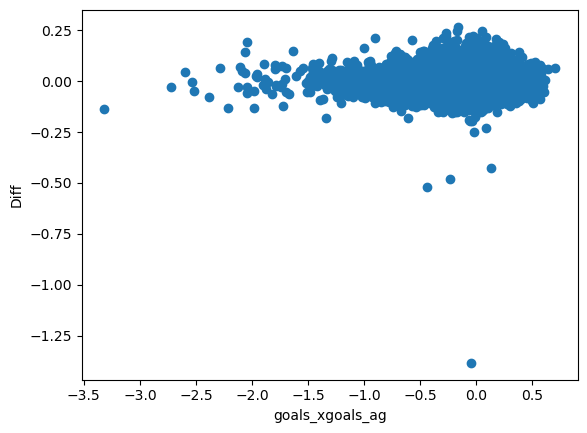

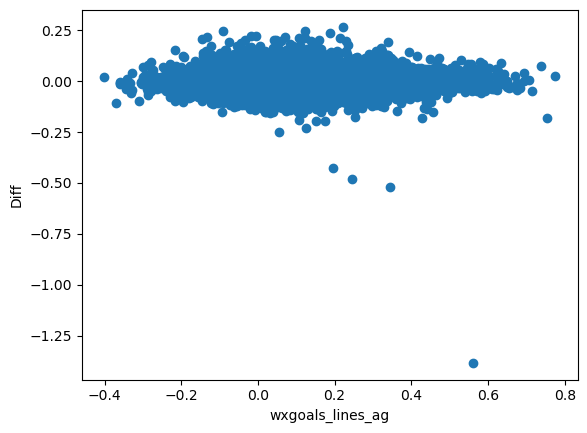

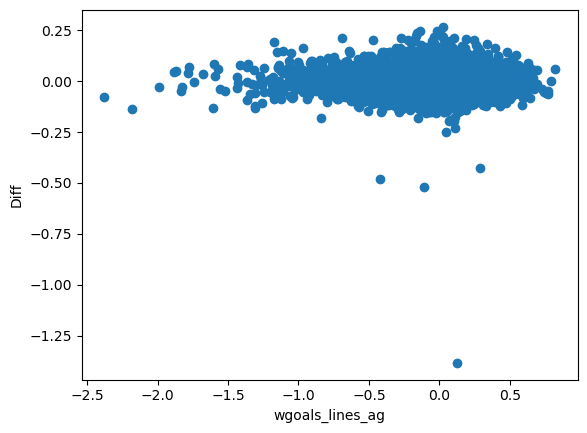

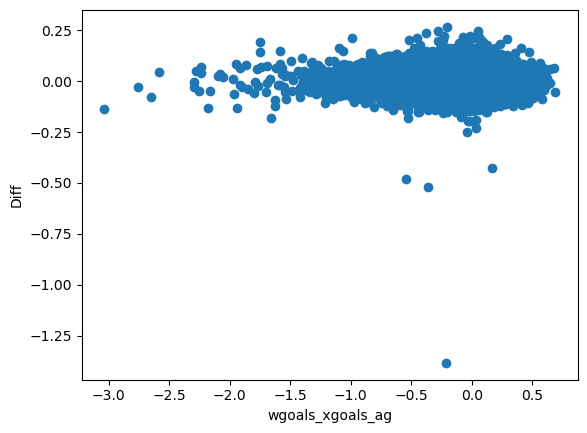

In [10]:
import matplotlib.pyplot as plt
param_names = ['xgoals_lines_for', 'goals_lines_for', 
            'goals_xgoals_for','wxgoals_lines_for', 
            'wgoals_lines_for', 'wgoals_xgoals_for']
param_names += ['xgoals_lines_ag', 'goals_lines_ag', 
                'goals_xgoals_ag','wxgoals_lines_ag', 
                'wgoals_lines_ag', 'wgoals_xgoals_ag']
for name in param_names:
    plt.scatter(data_with_predictions[name], data_with_predictions['Diff'])
    plt.xlabel(name)
    plt.ylabel('Diff')
    plt.show()

Doesn't appear to certain single feature values contribute to underperformance vs the null, now let's graph each feature to a team's ingame performance vs the null

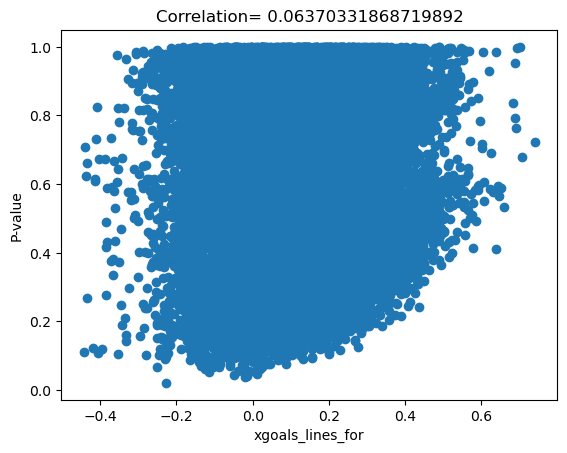

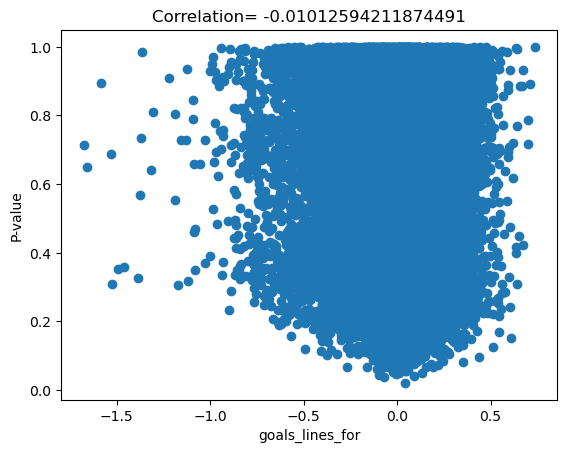

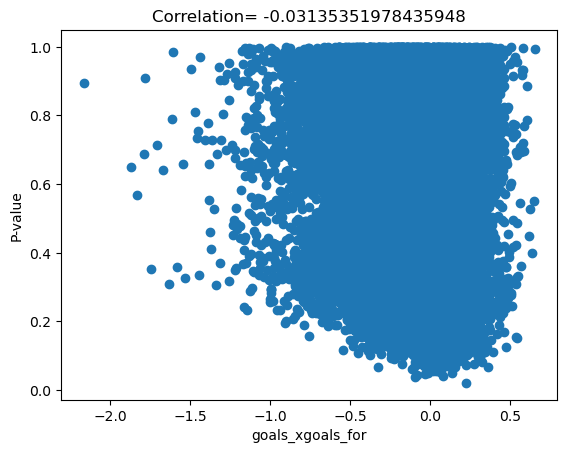

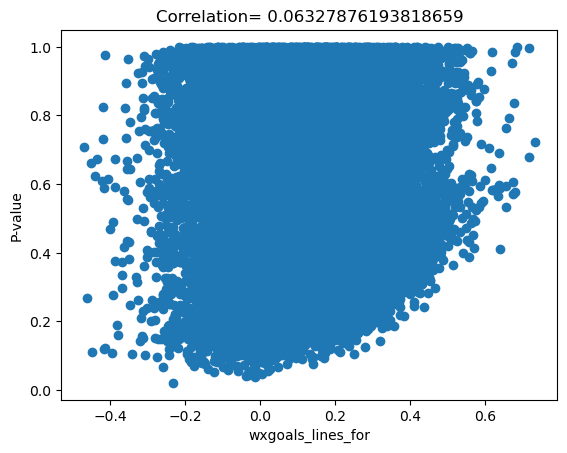

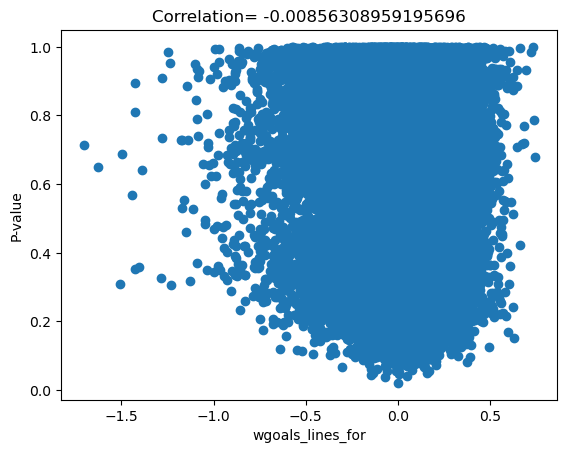

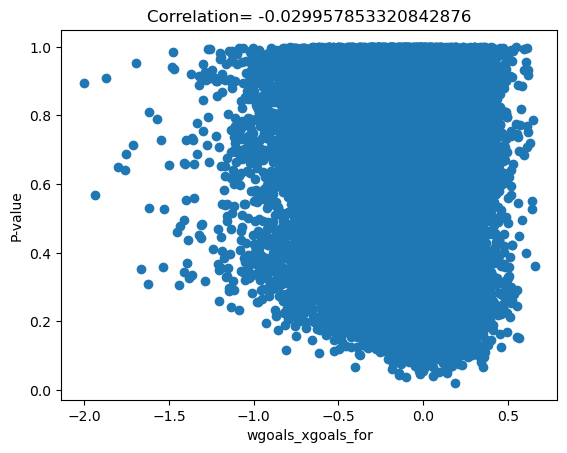

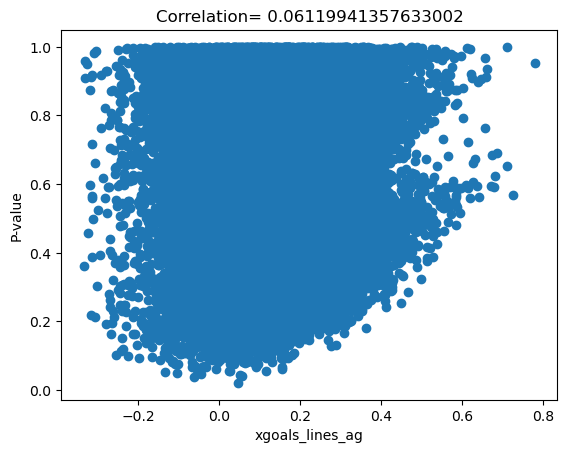

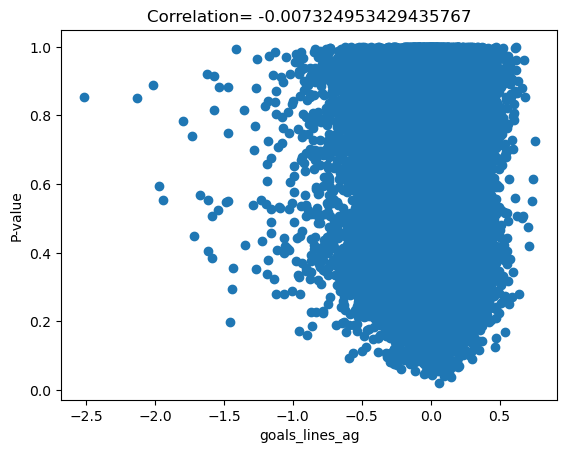

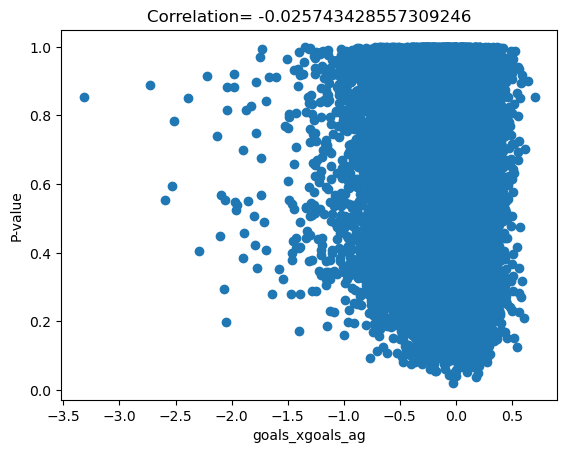

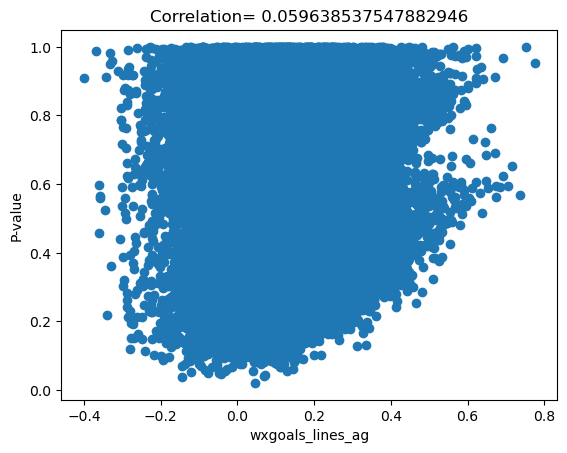

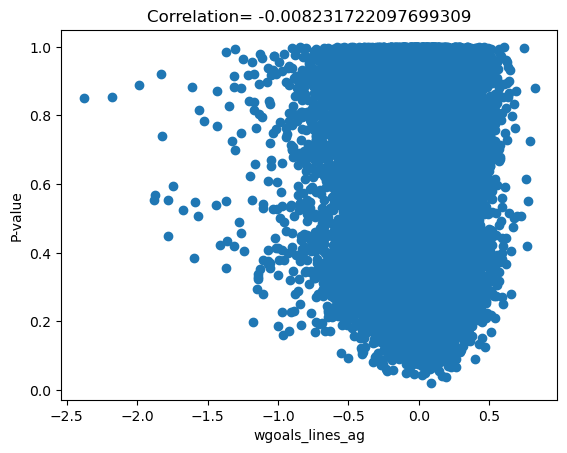

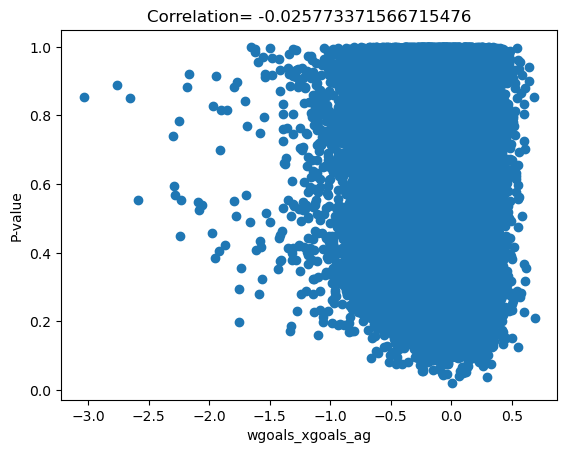

In [11]:
for name in param_names:
    plt.scatter(data_with_predictions[name], data_with_predictions['P-value'])
    plt.xlabel(name)
    plt.ylabel('P-value')
    plt.title('Correlation= ' + str(np.corrcoef(data_with_predictions[name], data_with_predictions['P-value'])[0][1]))
    plt.show()

Plots don't look too concerning, metrics involving exact goals do have some outliers likely from earlier in seasons. Maybe 8 games and 1 goal scored/conceded wasn't enough data. Let's see something before another grueling training process

In [12]:
def cdf(lamb, alpha):
    return (np.array([gpmf(i, lamb, alpha)[0] for i in range(10)]))
predictions_with_line = predictions.copy()
predictions_with_line['Line'] = round(predictions_with_line['Null Prediction']-.5)+.5

cdfs = cdf(predictions_with_line['Null Lambda'], predictions_with_line['Null Alpha']).T
cumsums = np.cumsum(cdfs, axis=1)

predictions_with_line['Null Under'] = cumsums[np.arange(len(predictions_with_line)), np.array(predictions_with_line['Line'] - .5).astype(int)] 
predictions_with_line['Null Over'] = 1 - predictions_with_line['Null Under']

cdfs = cdf(predictions_with_line['Model Lambda'], predictions_with_line['Model Alpha']).T
cumsums = np.cumsum(cdfs, axis=1)

predictions_with_line['Model Under'] = cumsums[np.arange(len(predictions_with_line)), np.array(predictions_with_line['Line'] - .5).astype(int)] 
predictions_with_line['Model Over'] = 1 - predictions_with_line['Model Under']
predictions_with_line['Under Kelly'] = np.maximum(predictions_with_line['Model Under']-predictions_with_line['Model Over']/(1/predictions_with_line['Null Under']-1),0)
predictions_with_line['Over Kelly'] = np.maximum(predictions_with_line['Model Over']-predictions_with_line['Model Under']/(1/predictions_with_line['Null Over']-1),0)
predictions_with_line['Under Mult'] = (1/predictions_with_line['Null Under'])
predictions_with_line['Over Mult'] = (1/predictions_with_line['Null Over'])
predictions_with_line['Under'] = predictions_with_line['Goals'] < predictions_with_line['Line']
predictions_with_line['Over'] = predictions_with_line['Goals'] > predictions_with_line['Line']
predictions_with_line['Profit'] = -predictions_with_line['Under Kelly'] + predictions_with_line['Under Kelly']*predictions_with_line['Under Mult']*predictions_with_line['Under']
predictions_with_line['Profit'] += -predictions_with_line['Over Kelly'] + predictions_with_line['Over Kelly']*predictions_with_line['Over Mult']*predictions_with_line['Over']

def threshold(uk, ok, thresh_high, thresh_low=1):
    uk = uk.copy()
    uk = np.where(uk<thresh_high, 0, uk)
    uk = np.where(uk>thresh_low, 0, uk)
    ok = ok.copy()
    ok = np.where(ok<thresh_high, 0, ok)
    ok = np.where(ok>thresh_low, 0, ok)
    profit = -uk + uk*predictions_with_line['Under Mult']*predictions_with_line['Under']
    profit += -ok + ok*predictions_with_line['Over Mult']*predictions_with_line['Over']
    print('Bets', sum(profit != 0))
    print('Profit', sum(profit))
    print('ROI', sum(profit)/(sum(uk)+sum(ok)))
threshold(predictions_with_line['Under Kelly'], predictions_with_line['Over Kelly'], 0, 1)
print()
for low in range(14):
    high = (low+1)/100
    print(low/100, high)
    threshold(predictions_with_line['Under Kelly'], predictions_with_line['Over Kelly'], low/100, high)
    print()
    
#5% roi when thresholded at kelly=.06
threshold(predictions_with_line['Under Kelly'], predictions_with_line['Over Kelly'], 0.06, 1)

Bets 36480
Profit 25.524279339506847
ROI 0.03384539513749648

0.0 0.01
Bets 11563
Profit 0.7738280970906932
ROI 0.013588785086577904

0.01 0.02
Bets 9522
Profit 0.1546370377924134
ROI 0.0011028798919343118

0.02 0.03
Bets 6639
Profit 7.614208417512744
ROI 0.046628303327017895

0.03 0.04
Bets 4097
Profit 7.834330284175788
ROI 0.055343993083591725

0.04 0.05
Bets 2257
Profit 4.984245959070922
ROI 0.04962520023816998

0.05 0.06
Bets 1260
Profit -0.03635844430391644
ROI -0.0005300112468729237

0.06 0.07
Bets 614
Profit 3.752201480828979
ROI 0.0946726409928093

0.07 0.08
Bets 285
Profit 0.3409646425132485
ROI 0.016075865567230493

0.08 0.09
Bets 150
Profit -0.24756179194291605
ROI -0.019569561915184226

0.09 0.1
Bets 49
Profit -0.43670533283970453
ROI -0.09408029628933332

0.1 0.11
Bets 25
Profit 0.22276743567923235
ROI 0.08491780884243301

0.11 0.12
Bets 7
Profit 0.21118478070131633
ROI 0.26669780256726633

0.12 0.13
Bets 7
Profit 0.2916229822130715
ROI 0.3332860589418875

0.13 0.14
Bets 5

In [13]:
predictions_with_line

,Null Lambda,Model Lambda,Null Alpha,Model Alpha,Null Prediction,Model Prediction,Goals,Line,Null Under,Null Over,Model Under,Model Over,Under Kelly,Over Kelly,Under Mult,Over Mult,Under,Over,Profit
0,1.079527,1.076298,-0.024,-0.020297,1.054226,1.054888,2.0,1.5,0.715441,0.284559,0.715239,0.284761,0.000000,0.000283,1.397739,3.514214,False,True,0.000712
1,0.949978,0.985569,-0.024,-0.030603,0.927713,0.956304,0.0,0.5,0.386750,0.613250,0.373227,0.626773,0.000000,0.034965,2.585653,1.630655,True,False,-0.034965
2,1.094548,1.142372,-0.024,-0.034942,1.068895,1.103803,0.0,1.5,0.709924,0.290076,0.696509,0.303491,0.000000,0.018897,1.408601,3.447376,True,False,-0.018897
3,1.373471,1.371363,-0.024,-0.025032,1.341280,1.337874,1.0,1.5,0.609474,0.390526,0.610580,0.389420,0.002832,0.000000,1.640759,2.560649,True,False,0.001815
4,0.681730,0.679763,-0.024,-0.031761,0.665752,0.658837,1.0,0.5,0.505742,0.494258,0.506737,0.493263,0.002015,0.000000,1.977295,2.023233,False,True,-0.002015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36475,1.904947,1.941786,-0.024,-0.032600,1.860299,1.880482,2.0,1.5,0.439232,0.560768,0.431222,0.568778,0.000000,0.018235,2.276703,1.783267,False,True,0.014283
36476,1.897266,1.844239,-0.024,-0.022457,1.852799,1.803732,2.0,1.5,0.441438,0.558562,0.456428,0.543572,0.026836,0.000000,2.265323,1.790312,False,True,-0.026836
36477,1.707834,1.759997,-0.024,-0.026602,1.667807,1.714391,0.0,1.5,0.498336,0.501664,0.483008,0.516992,0.000000,0.030758,2.006680,1.993365,True,False,-0.030758
36478,1.760862,1.833753,-0.024,-0.039223,1.719591,1.764542,1.0,1.5,0.481935,0.518065,0.464593,0.535407,0.000000,0.035985,2.074967,1.930261,True,False,-0.035985


Let's test on completely unseen data, 20+ new leagues. Will also demonstrate how to extract lines from betting odds

In [14]:
import shelve
from scipy.optimize import brentq, fsolve, minimize
from patsy import dmatrices
from numpy import exp, power, log

def weighted_average(arr, decay_factor):
    # Get the length of the array
    length = len(arr)
    
    # Compute the weights based on the decay factor
    weights = np.power(decay_factor, np.arange(length)[::-1])
    
    # Normalize the weights
    weights /= np.sum(weights)
    
    # Compute the weighted average
    weighted_avg = np.dot(arr, weights)
    return weighted_avg

def metrics(team, goals_for, goals_ag, xgoals_for, xgoals_ag, lines_for, lines_ag, weighted=False, decay_factor=.5):
    if not weighted:
        xgf = np.mean(xgoals_for[team])
        lf = np.mean(lines_for[team])
        gf = np.mean(goals_for[team])
        xga = np.mean(xgoals_ag[team])
        la = np.mean(lines_ag[team])
        ga = np.mean(goals_ag[team])
    else:
        xgf = weighted_average(xgoals_for[team], decay_factor)
        lf = weighted_average(lines_for[team], decay_factor)
        gf = weighted_average(goals_for[team], decay_factor)
        xga = weighted_average(xgoals_ag[team], decay_factor)
        la = weighted_average(lines_ag[team], decay_factor)
        ga = weighted_average(goals_ag[team], decay_factor)
    #print(xgf, lf, gf, xga, la, ga)
    #if gammaincc(xgf, lf) < 1e-5:
    #    print(xgoals_for[team], lines_for[team])
    return gammaincc(xgf, lf), gammaincc(gf, lf), gammaincc(gf, xgf), gammaincc(xga, la), gammaincc(ga, la), gammaincc(ga, xga)

def get_a(x, y):
    def f(a):
        # Define the inner function f(a)
        # It takes a single argument 'a'

        # Compute the difference between gammaincc(a, x) and y
        result = gammaincc(a, x) - y

        # Return the result
        return result

    # Return the inner function f(a)
    return f

def convert_metric(line, metric):
    # Convert a given line using a metric

    # Use brentq method to find the value of 'a' that satisfies the equation get_a(line, metric)(a) = 0,
    # within the interval [0, 10]
    adjusted_line = brentq(get_a(line, metric), 0, 10)
    
    # Compute the natural logarithm of the ratio between the adjusted_line and the original line
    # to determine parameter for model
    result = np.log(max(1e-8,adjusted_line) / line)
    #if adjusted_line < 1e-8:
    #    print(adjusted_line, line, result, metric)
    
    # Return the result
    return result

def extract_probabilities(l):
    margin = -1
    for num in l:
        margin += 1 / num
    probs = []
    for num in l:
        probs.append((len(l)-margin*num)/(len(l)*num))
    return tuple(probs)



    




In [15]:
scores = []
for i in range(14):
    for j in range(14):
        scores.append([i, j])
        
base = pd.DataFrame(scores)
base.columns=['home', 'away']
base['diff'] = base['away']-base['home']
base['total'] = base['home']+base['away']
factorials = {}
for i in range(14):
    factorials[i] = factorial(i)
def biv_gen_poisson_pmf(x, y, theta1, theta2, theta3, lambda1, lambda2, lambda3):
    def part1():
        
        return theta1 * theta2 * theta3 * exp(-theta1-theta2-theta3-x*lambda1-y*lambda2) #* sum([k(u) for u in range(x+y)])
    def part2():
        def k(u, x, y):
            return power(theta1+(x-u)*lambda1, x-u-1) / factorials[x-u] * power(theta2+(y-u)*lambda2, y-u-1) / factorials[y-u] * power(theta3+u*lambda3, u-1) / factorials[u] * exp(u*(lambda1+lambda2-lambda3))
        arr = np.array([])
        for i in range(14):
            for j in range(14):
                arr = np.append( arr, sum(k(u, i, j) for u in range(min(i, j)+1)) )
        return arr
                
    return part1()*part2()

def get_theta3(cor, theta1, theta2, lambda1, lambda2=None, lambda3=None, special=True):
    if not lambda2:
        lambda2 = lambda3 = lambda1
    def c(thet):
        if special:
            return thet * power((theta1+thet)*(theta2+thet), -.5) - cor
            
        return thet * power((theta1*power(1-lambda1, -3)*power(1-lambda3, 3)+thet)*(theta2*power(1-lambda2, -3)*power(1-lambda3, 3)+thet), -.5) - cor
    return fsolve(c, cor)[0]

def get_params(h, d, a, yes, no):
    def func(x):
        
        theta1 = x[0]
        theta2 = x[1]
        theta3 = get_theta3(.0048, theta1, theta2, -.024) 
        b = base.copy()
        b['prob'] = biv_gen_poisson_pmf(b['home'], b['away'], theta1, theta2, theta3, -.024, -.024, -.024)
        hhat = sum(b.query("diff < 0")['prob'])
        dhat = sum(b.query("diff == 0")['prob'])
        ahat = 1-hhat-dhat
        yeshat = sum(b.query("home > 0 & away > 0")['prob'])
        nohat = 1-yeshat
        
        bestml = h*log(h)+d*log(d)+a*log(a)
        error1 = h*log(hhat)+d*log(dhat)+a*log(ahat)
        error1 /= bestml
        
        bestbtts = yes*log(yes)+no*log(no)
        error2 = yes*log(yeshat)+no*log(nohat)
        error2 /= bestbtts
        
        
        
        #P.append((error1+error2+error3, x))   
        return error1 + error2
    mini = minimize(func, [1.3, 1.1])
    return mini




In [16]:
games = pd.read_csv('new leagues.csv')
games = games.query('odds_btts_yes>0 & team_a_xg>0 & odds_ft_home_team_win>0')

# dictionaries to store stats for each team
goals_for = {}
goals_ag = {}
xgoals_for = {}
xgoals_ag = {}
lines_for = {}
lines_ag = {}

# parameter names for the metrics
param_names = ['goals', 'loglines']
param_names += ['xgoals_lines_for', 'goals_lines_for', 
                'goals_xgoals_for','wxgoals_lines_for', 
                'wgoals_lines_for', 'wgoals_xgoals_for']
param_names += ['xgoals_lines_ag', 'goals_lines_ag', 
                'goals_xgoals_ag','wxgoals_lines_ag', 
                'wgoals_lines_ag', 'wgoals_xgoals_ag']

# minimum sample size for teams before betting on a match
min_sample_size = 8

# list to store training data rows
training_rows = []
last_game = {}
for team in set(games['home_team_name']):
    last_game[team] = 0

decay = .93
hls = []
als = []
lines = shelve.open('lines')
# Iterate over each row in the DataFrame
for index, row in games.iterrows(): 
    home_team = row['home_team_name']
    away_team = row['away_team_name']
    timestamp = row['timestamp']
    if timestamp - last_game[home_team] >= 86400*60: #2 months since last game
        goals_for[home_team] = []
        goals_ag[home_team] = []
        xgoals_for[home_team] = []
        xgoals_ag[home_team] = []
        lines_for[home_team] = []
        lines_ag[home_team] = []
    if timestamp - last_game[away_team] >= 86400*60: # reset
        goals_for[away_team] = []
        goals_ag[away_team] = []
        xgoals_for[away_team] = []
        xgoals_ag[away_team] = []
        lines_for[away_team] = []
        lines_ag[away_team] = []
 
   
    
    
   
    id_ = str(timestamp)+home_team+away_team
    if id_ in lines:
        h_line, a_line = lines[id_]
    else:
        h, d, a = extract_probabilities([row['odds_ft_home_team_win'], row['odds_ft_draw'], row['odds_ft_away_team_win']])
        yes, no = extract_probabilities([row['odds_btts_yes'], row['odds_btts_no']])
        params = get_params(h, d, a, yes, no).x
        theta1, theta2 = params
        theta3 = get_theta3(.0048, theta1, theta2, -.024) 
        h_line = theta1/(1+.024)+theta3/(1+.024)
        a_line = theta2/(1+.024)+theta3/(1+.024)
        lines[id_] = (h_line, a_line)
        
    hls.append(h_line)
    als.append(a_line)
    h_goals = row['home_team_goal_count']
    a_goals = row['away_team_goal_count']

    # Check if both teams have sufficient data for betting
    if home_team in goals_for and away_team in goals_for and len(goals_for[home_team]) >= min_sample_size and len(goals_for[away_team]) >= min_sample_size and sum(goals_for[home_team])>0 and sum(goals_for[away_team])>0 and sum(goals_ag[home_team])>0 and sum(goals_ag[away_team])>0:

        # Calculate various metrics for home and away teams
        h_xgoals_vs_lines_for, h_goals_vs_lines_for, h_goals_vs_xgoals_for, h_xgoals_vs_lines_ag, h_goals_vs_lines_ag, h_goals_vs_xgoals_ag = metrics(home_team, goals_for, goals_ag, xgoals_for, xgoals_ag, lines_for, lines_ag)
        a_xgoals_vs_lines_for, a_goals_vs_lines_for, a_goals_vs_xgoals_for, a_xgoals_vs_lines_ag, a_goals_vs_lines_ag, a_goals_vs_xgoals_ag = metrics(away_team, goals_for, goals_ag, xgoals_for, xgoals_ag, lines_for, lines_ag)
        weighted_h_xgoals_vs_lines_for, weighted_h_goals_vs_lines_for, weighted_h_goals_vs_xgoals_for, weighted_h_xgoals_vs_lines_ag, weighted_h_goals_vs_lines_ag, weighted_h_goals_vs_xgoals_ag = metrics(home_team, goals_for, goals_ag, xgoals_for, xgoals_ag, lines_for, lines_ag, True, decay)
        weighted_a_xgoals_vs_lines_for, weighted_a_goals_vs_lines_for, weighted_a_goals_vs_xgoals_for, weighted_a_xgoals_vs_lines_ag, weighted_a_goals_vs_lines_ag, weighted_a_goals_vs_xgoals_ag = metrics(away_team, goals_for, goals_ag, xgoals_for, xgoals_ag, lines_for, lines_ag, True, decay)

        # Apply the convert_metric function to each metric for home and away teams
        home_metrics = [h_xgoals_vs_lines_for, h_goals_vs_lines_for, h_goals_vs_xgoals_for, weighted_h_xgoals_vs_lines_for, weighted_h_goals_vs_lines_for, weighted_h_goals_vs_xgoals_for]
        home_metrics += [a_xgoals_vs_lines_ag, a_goals_vs_lines_ag, a_goals_vs_xgoals_ag, weighted_a_xgoals_vs_lines_ag, weighted_a_goals_vs_lines_ag, weighted_a_goals_vs_xgoals_ag]
        away_metrics = [a_xgoals_vs_lines_for, a_goals_vs_lines_for, a_goals_vs_xgoals_for, weighted_a_xgoals_vs_lines_for, weighted_a_goals_vs_lines_for, weighted_a_goals_vs_xgoals_for]
        away_metrics += [h_xgoals_vs_lines_ag, h_goals_vs_lines_ag, h_goals_vs_xgoals_ag, weighted_h_xgoals_vs_lines_ag, weighted_h_goals_vs_lines_ag, weighted_h_goals_vs_xgoals_ag]
        
        try:
            for i in range(12):
                home_metrics[i] = convert_metric(h_line, home_metrics[i])
                away_metrics[i] = convert_metric(a_line, away_metrics[i])
        except:
            continue
                           
        # Create complete metrics Series for home and away teams
        complete_home_metrics = pd.Series([h_goals, np.log(h_line*1.024)]+home_metrics,index=param_names)
        complete_away_metrics = pd.Series([a_goals, np.log(a_line*1.024)]+away_metrics,index=param_names)

        # Append the metrics Series to the training_rows list
        training_rows.append(complete_home_metrics)
        training_rows.append(complete_away_metrics)

    # Update the dictionaries with new data for goals, expected goals, and lines
    h_xg = row['team_a_xg']
    a_xg = row['team_b_xg']
    if abs(h_line) <= 10 and abs(a_line) <= 10:
        goals_for[home_team] = goals_for.setdefault(home_team, [])+[h_goals]
        goals_for[away_team] = goals_for.setdefault(away_team, [])+[a_goals]
        goals_ag[home_team] = goals_ag.setdefault(home_team, [])+[a_goals]
        goals_ag[away_team] = goals_ag.setdefault(away_team, [])+[h_goals]
        xgoals_for[home_team] = xgoals_for.setdefault(home_team, [])+[h_xg]
        xgoals_for[away_team] = xgoals_for.setdefault(away_team, [])+[a_xg]
        xgoals_ag[home_team] = xgoals_ag.setdefault(home_team, [])+[a_xg]
        xgoals_ag[away_team] = xgoals_ag.setdefault(away_team, [])+[h_xg]
        lines_for[home_team] = lines_for.setdefault(home_team, [])+[h_line]
        lines_for[away_team] = lines_for.setdefault(away_team, [])+[a_line]
        lines_ag[home_team] = lines_ag.setdefault(home_team, [])+[a_line]
        lines_ag[away_team] = lines_ag.setdefault(away_team, [])+[h_line]
        last_game[home_team] = last_game[away_team] = timestamp
lines.close()  
expr = 'goals ~ loglines'
data_new = pd.concat(training_rows, axis=1).T


C:\Users\Bryant Ndongmo\AppData\Local\Temp\ipykernel_77404\3504800229.py:63: RuntimeWarning: invalid value encountered in log
  result = np.log(max(1e-8,adjusted_line) / line)
C:\Users\Bryant Ndongmo\AppData\Local\Temp\ipykernel_77404\3504800229.py:63: RuntimeWarning: invalid value encountered in log
  result = np.log(max(1e-8,adjusted_line) / line)
C:\Users\Bryant Ndongmo\AppData\Local\Temp\ipykernel_77404\3504800229.py:63: RuntimeWarning: invalid value encountered in log
  result = np.log(max(1e-8,adjusted_line) / line)
C:\Users\Bryant Ndongmo\AppData\Local\Temp\ipykernel_77404\3504800229.py:63: RuntimeWarning: invalid value encountered in log
  result = np.log(max(1e-8,adjusted_line) / line)


In [17]:
for name in data_new.columns[2:]:
    expr += ' + '+name
y, X = dmatrices(expr, data_new, return_type='matrix')
params = [-4.62319386e-02,  1.09529993e+00, -8.10055683e-02, -6.15535437e-02,
        9.38547919e-02,  2.04022371e-01,  3.82601271e-02, -1.38517403e-01,
        5.79986228e-02,  2.44191826e-02,  4.11575600e-03, -4.76232303e-02,
       -9.72798389e-02,  4.99641666e-03,  9.32562650e-02, -3.10782439e-01,
        8.71577801e-03,  4.02503902e-02,  9.65152783e-02,  3.33392781e-02,
        4.55263935e-02,  6.88530381e-02,  1.51259265e-02,  2.34688581e-03,
        4.01700326e-02, -6.41320951e-04,  5.73317380e-02,  1.12787744e-01]

beta1 = np.array(params[:14]).T.reshape(-1,1)
beta2 = np.array(params[14:]).T.reshape(-1,1)

null_params = [0, 1]+[0]*26
null_beta1 = np.array(null_params[:14]).T.reshape(-1,1)
null_beta2 = np.array(null_params[14:]).T.reshape(-1,1)

lamb = np.exp(X@beta1)
alpha = np.tanh(X@beta2)*.1-.024
preds = lamb/(1-alpha)
p = gpmf(y, lamb, alpha)[0]
loss = -np.log(p)
average_loss = np.mean(loss)


null_lamb = np.exp(X@null_beta1)
null_alpha = np.tanh(X@null_beta2)*.1-.024
null_preds = null_lamb/(1-null_alpha)
null_p = gpmf(y, null_lamb, null_alpha)[0]
null_loss = -np.log(null_p)
null_average_loss = np.mean(null_loss)

predictions_with_line_new = pd.DataFrame()
predictions_with_line_new['Null Lambda'] = null_lamb.reshape(-1,)
predictions_with_line_new['Model Lambda'] = lamb.reshape(-1,) 
predictions_with_line_new['Null Alpha'] = null_alpha.reshape(-1,)
predictions_with_line_new['Model Alpha'] = alpha.reshape(-1,) 
predictions_with_line_new['Null Prediction'] = null_preds.reshape(-1,)
predictions_with_line_new['Model Prediction'] = preds.reshape(-1,) 
predictions_with_line_new['Goals'] = y
predictions_with_line_new['Line'] = round(predictions_with_line_new['Null Prediction']-.5)+.5

cdfs = cdf(predictions_with_line_new['Null Lambda'], predictions_with_line_new['Null Alpha']).T
cumsums = np.cumsum(cdfs, axis=1)

predictions_with_line_new['Null Under'] = cumsums[np.arange(len(predictions_with_line_new)), np.array(predictions_with_line_new['Line'] - .5).astype(int)] 
predictions_with_line_new['Null Over'] = 1 - predictions_with_line_new['Null Under']

cdfs = cdf(predictions_with_line_new['Model Lambda'], predictions_with_line_new['Model Alpha']).T
cumsums = np.cumsum(cdfs, axis=1)

predictions_with_line_new['Model Under'] = cumsums[np.arange(len(predictions_with_line_new)), np.array(predictions_with_line_new['Line'] - .5).astype(int)] 
predictions_with_line_new['Model Over'] = 1 - predictions_with_line_new['Model Under']
predictions_with_line_new['Under Kelly'] = np.maximum(predictions_with_line_new['Model Under']-predictions_with_line_new['Model Over']/(1/predictions_with_line_new['Null Under']-1),0)
predictions_with_line_new['Over Kelly'] = np.maximum(predictions_with_line_new['Model Over']-predictions_with_line_new['Model Under']/(1/predictions_with_line_new['Null Over']-1),0)
predictions_with_line_new['Under Mult'] = (1/predictions_with_line_new['Null Under'])
predictions_with_line_new['Over Mult'] = (1/predictions_with_line_new['Null Over'])
predictions_with_line_new['Under'] = predictions_with_line_new['Goals'] < predictions_with_line_new['Line']
predictions_with_line_new['Over'] = predictions_with_line_new['Goals'] > predictions_with_line_new['Line']
predictions_with_line_new['Profit'] = -predictions_with_line_new['Under Kelly'] + predictions_with_line_new['Under Kelly']*predictions_with_line_new['Under Mult']*predictions_with_line_new['Under']
predictions_with_line_new['Profit'] += -predictions_with_line_new['Over Kelly'] + predictions_with_line_new['Over Kelly']*predictions_with_line_new['Over Mult']*predictions_with_line_new['Over']

def threshold(uk, ok, thresh_high, thresh_low=1):
    uk = uk.copy()
    uk = np.where(uk<thresh_high, 0, uk)
    uk = np.where(uk>thresh_low, 0, uk)
    ok = ok.copy()
    ok = np.where(ok<thresh_high, 0, ok)
    ok = np.where(ok>thresh_low, 0, ok)
    profit = -uk + uk*predictions_with_line_new['Under Mult']*predictions_with_line_new['Under']
    profit += -ok + ok*predictions_with_line_new['Over Mult']*predictions_with_line_new['Over']
    print('Bets', sum(profit != 0))
    print('Profit', sum(profit))
    print('ROI', sum(profit)/(sum(uk)+sum(ok)))
threshold(predictions_with_line_new['Under Kelly'], predictions_with_line_new['Over Kelly'], 0, 1)
print()
for low in range(14):
    high = (low+1)/100
    print(low/100, high)
    threshold(predictions_with_line_new['Under Kelly'], predictions_with_line_new['Over Kelly'], low/100, high)
    print()
#almost 5% roi when thresholded at 7% kelly
threshold(predictions_with_line_new['Under Kelly'], predictions_with_line_new['Over Kelly'], 0.07, 1)

Bets 35106
Profit 9.929216062280751
ROI 0.012363662727467055

0.0 0.01
Bets 10023
Profit 0.10454730923478464
ROI 0.0021348223726677176

0.01 0.02
Bets 8652
Profit 0.8814780437381151
ROI 0.0068975602442740945

0.02 0.03
Bets 6523
Profit 1.8748466362945042
ROI 0.011625892530054513

0.03 0.04
Bets 4207
Profit 5.053578476906112
ROI 0.034693676034461975

0.04 0.05
Bets 2586
Profit -0.9322108108094445
ROI -0.008080021828913899

0.05 0.06
Bets 1473
Profit -1.087957603180748
ROI -0.013531446628460921

0.06 0.07
Bets 776
Profit 0.4451736004805716
ROI 0.008889718109457859

0.07 0.08
Bets 404
Profit 1.5235752838692875
ROI 0.05066493218536513

0.08 0.09
Bets 240
Profit 1.091418235702203
ROI 0.05377924092718821

0.09 0.1
Bets 124
Profit 0.9247616103949652
ROI 0.07914925720567487

0.1 0.11
Bets 44
Profit 0.13576941206623333
ROI 0.029551690029763593

0.11 0.12
Bets 26
Profit -0.4830698386350848
ROI -0.16233810101803325

0.12 0.13
Bets 7
Profit 0.09586297425069198
ROI 0.10858125248079373

0.13 0.14
Be

In [18]:
predictions_with_line_new

,Null Lambda,Model Lambda,Null Alpha,Model Alpha,Null Prediction,Model Prediction,Goals,Line,Null Under,Null Over,Model Under,Model Over,Under Kelly,Over Kelly,Under Mult,Over Mult,Under,Over,Profit
0,1.620027,1.707936,-0.024,-0.036818,1.582057,1.647286,0.0,1.5,0.526273,0.473727,0.502394,0.497606,0.000000,0.045374,1.900153,2.110922,True,False,-0.045374
1,0.786238,0.787639,-0.024,-0.022074,0.767810,0.770628,0.0,0.5,0.455556,0.544444,0.454918,0.545082,0.000000,0.001400,2.195122,1.836735,True,False,-0.001400
2,2.590986,2.787004,-0.024,-0.047334,2.530259,2.661045,5.0,2.5,0.532892,0.467108,0.495703,0.504297,0.000000,0.069787,1.876554,2.140831,False,True,0.079615
3,0.589996,0.572846,-0.024,-0.013068,0.576168,0.565457,0.0,0.5,0.554329,0.445671,0.563918,0.436082,0.021516,0.000000,1.803982,2.243809,True,False,0.017298
4,2.039151,2.079287,-0.024,-0.039097,1.991358,2.001053,2.0,1.5,0.401959,0.598041,0.395335,0.604665,0.000000,0.016479,2.487819,1.672125,False,True,0.011076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35101,0.830543,0.861410,-0.024,-0.033099,0.811077,0.833812,0.0,0.5,0.435813,0.564187,0.422566,0.577434,0.000000,0.030396,2.294564,1.772461,True,False,-0.030396
35102,1.206961,1.162303,-0.024,-0.022858,1.178673,1.136328,1.0,1.5,0.668882,0.331118,0.684698,0.315302,0.047766,0.000000,1.495032,3.020071,True,False,0.023646
35103,1.206963,1.166193,-0.024,-0.020518,1.178674,1.142746,0.0,1.5,0.668881,0.331119,0.682411,0.317589,0.040860,0.000000,1.495034,3.020064,True,False,0.020227
35104,1.420526,1.417552,-0.024,-0.030823,1.387232,1.375166,0.0,1.5,0.593103,0.406897,0.596540,0.403460,0.008446,0.000000,1.686047,2.457627,True,False,0.005795


Success